In [21]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# SRN
SRN = "PES2UG23CS367"
print("SRN:", SRN)


SRN: PES2UG23CS367


In [22]:
# Create and split Moons dataset
X_moons, y_moons = make_moons(n_samples=500, noise=0.25, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42, stratify=y_moons
)

scaler_moons = StandardScaler()
X_train_m_s = scaler_moons.fit_transform(X_train_m)
X_test_m_s = scaler_moons.transform(X_test_m)

print("Moons shapes:", X_train_m_s.shape, X_test_m_s.shape)


Moons shapes: (350, 2) (150, 2)


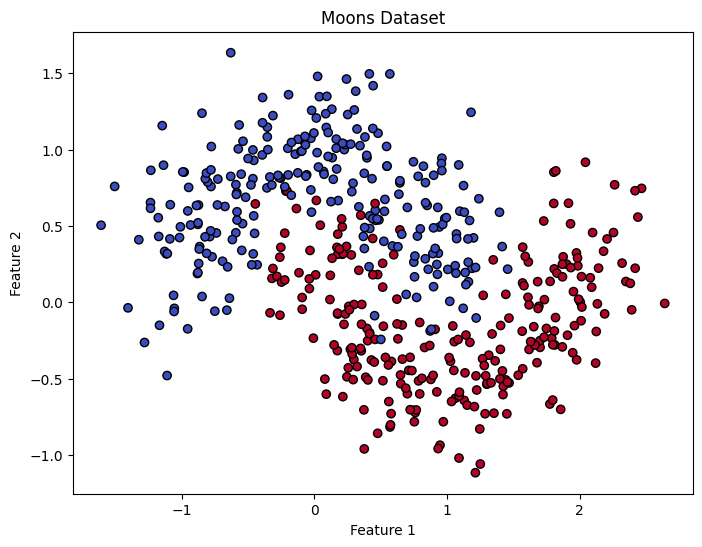

In [23]:
# Visualize the Moons dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moons Dataset')
plt.show()


In [24]:
# Helper function to visualize SVM decision boundaries
def plot_decision_boundaries(X, y, model, title="Decision Boundary"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()


=== Moons: Linear SVM ===
SRN: PES2UG23CS367
              precision    recall  f1-score   support

           0     0.8228    0.8667    0.8442        75
           1     0.8592    0.8133    0.8356        75

    accuracy                         0.8400       150
   macro avg     0.8410    0.8400    0.8399       150
weighted avg     0.8410    0.8400    0.8399       150

Accuracy: 0.84


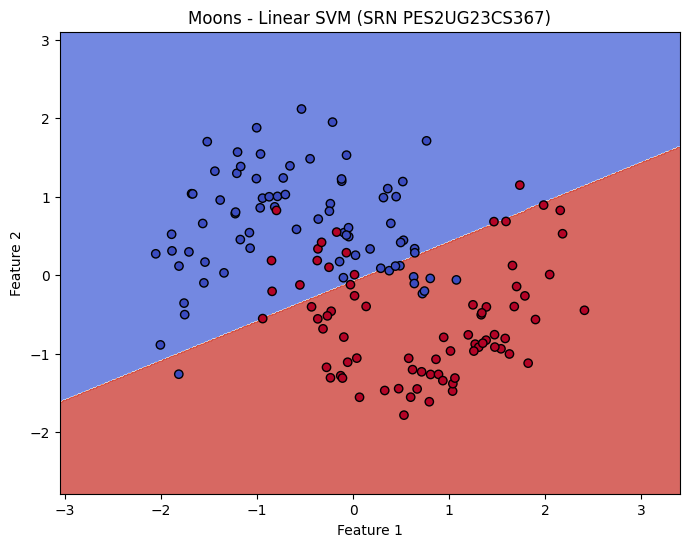

In [25]:
# Moons - Linear SVM
svc_linear_m = SVC(kernel='linear', C=1.0, random_state=42)
svc_linear_m.fit(X_train_m_s, y_train_m)
y_pred_m_linear = svc_linear_m.predict(X_test_m_s)

print("=== Moons: Linear SVM ===")
print(f"SRN: {SRN}")
print(classification_report(y_test_m, y_pred_m_linear, digits=4))
print("Accuracy:", accuracy_score(y_test_m, y_pred_m_linear))

plot_decision_boundaries(X_test_m_s, y_test_m, svc_linear_m,
                         title=f"Moons - Linear SVM (SRN {SRN})")


=== Moons: RBF SVM ===
SRN: PES2UG23CS367
              precision    recall  f1-score   support

           0     0.9241    0.9733    0.9481        75
           1     0.9718    0.9200    0.9452        75

    accuracy                         0.9467       150
   macro avg     0.9479    0.9467    0.9466       150
weighted avg     0.9479    0.9467    0.9466       150

Accuracy: 0.9466666666666667


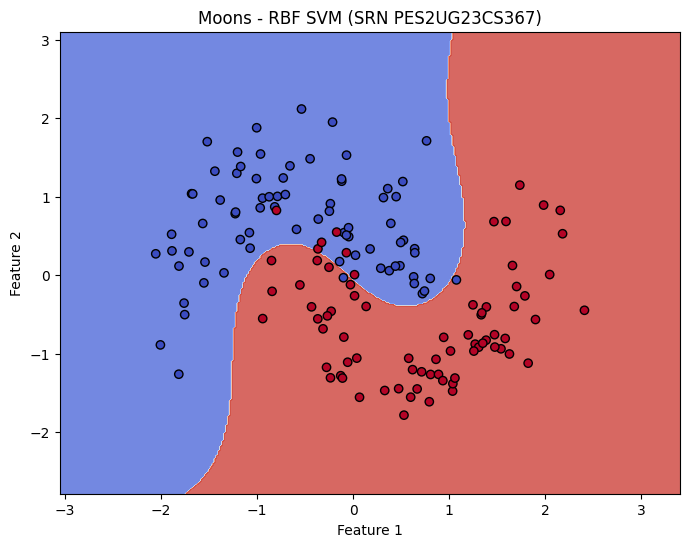

In [26]:
# Moons - RBF SVM
svc_rbf_m = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_rbf_m.fit(X_train_m_s, y_train_m)
y_pred_m_rbf = svc_rbf_m.predict(X_test_m_s)

print("=== Moons: RBF SVM ===")
print(f"SRN: {SRN}")
print(classification_report(y_test_m, y_pred_m_rbf, digits=4))
print("Accuracy:", accuracy_score(y_test_m, y_pred_m_rbf))

plot_decision_boundaries(X_test_m_s, y_test_m, svc_rbf_m,
                         title=f"Moons - RBF SVM (SRN {SRN})")


=== Moons: Poly SVM ===
SRN: PES2UG23CS367
              precision    recall  f1-score   support

           0     0.9359    0.9733    0.9542        75
           1     0.9722    0.9333    0.9524        75

    accuracy                         0.9533       150
   macro avg     0.9541    0.9533    0.9533       150
weighted avg     0.9541    0.9533    0.9533       150

Accuracy: 0.9533333333333334


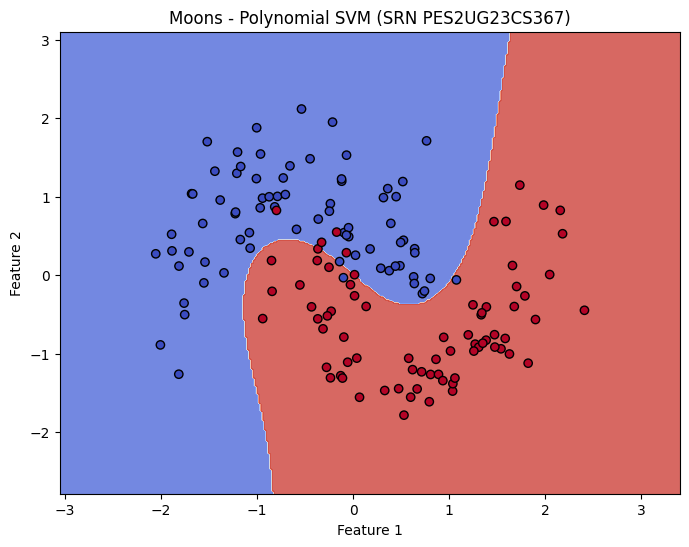

In [27]:
# Moons - Polynomial SVM
svc_poly_m = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', coef0=1, random_state=42)
svc_poly_m.fit(X_train_m_s, y_train_m)
y_pred_m_poly = svc_poly_m.predict(X_test_m_s)

print("=== Moons: Poly SVM ===")
print(f"SRN: {SRN}")
print(classification_report(y_test_m, y_pred_m_poly, digits=4))
print("Accuracy:", accuracy_score(y_test_m, y_pred_m_poly))

plot_decision_boundaries(X_test_m_s, y_test_m, svc_poly_m,
                         title=f"Moons - Polynomial SVM (SRN {SRN})")


Moons - Soft (C=0.1) Accuracy: 0.8933333333333333
Moons - Hard (C=100) Accuracy: 0.94


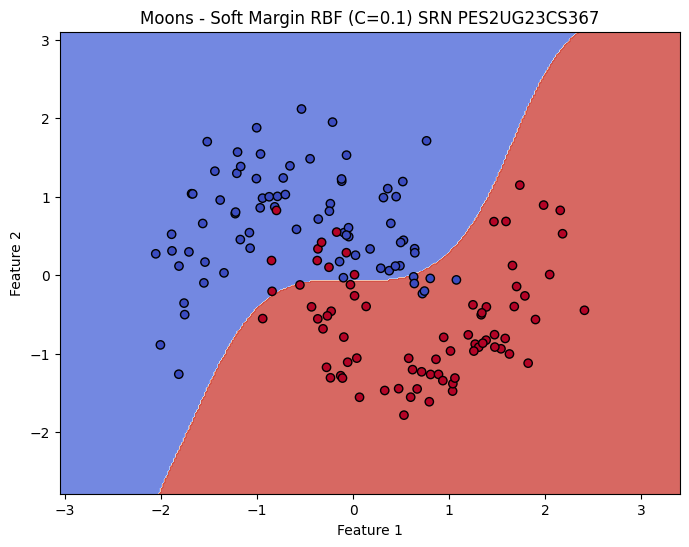

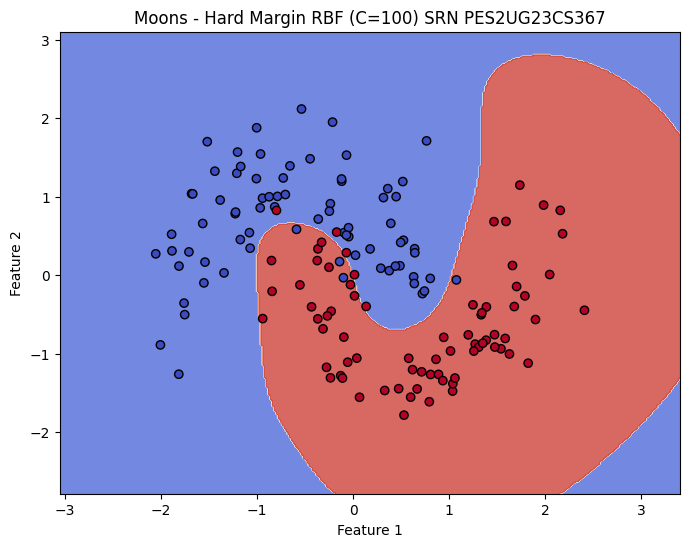

In [28]:
# Moons - Soft vs Hard margin comparison
svc_soft = SVC(kernel='rbf', C=0.1, gamma='scale', random_state=42)
svc_hard = SVC(kernel='rbf', C=100.0, gamma='scale', random_state=42)

svc_soft.fit(X_train_m_s, y_train_m)
svc_hard.fit(X_train_m_s, y_train_m)

y_soft = svc_soft.predict(X_test_m_s)
y_hard = svc_hard.predict(X_test_m_s)

print("Moons - Soft (C=0.1) Accuracy:", accuracy_score(y_test_m, y_soft))
print("Moons - Hard (C=100) Accuracy:", accuracy_score(y_test_m, y_hard))

plot_decision_boundaries(X_test_m_s, y_test_m, svc_soft,
                         title=f"Moons - Soft Margin RBF (C=0.1) SRN {SRN}")
plot_decision_boundaries(X_test_m_s, y_test_m, svc_hard,
                         title=f"Moons - Hard Margin RBF (C=100) SRN {SRN}")


In [29]:
# Train and store all SVM models for Moons dataset
models_moons = {}
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    if kernel == 'poly':
        model = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', coef0=1, random_state=42)
    else:
        model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    model.fit(X_train_m_s, y_train_m)
    models_moons[kernel] = model

print("Trained models_moons:", list(models_moons.keys()))


Trained models_moons: ['linear', 'rbf', 'poly']


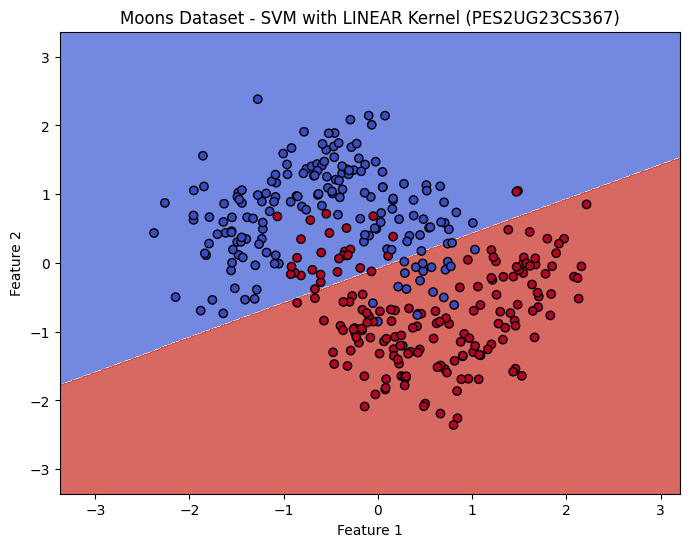

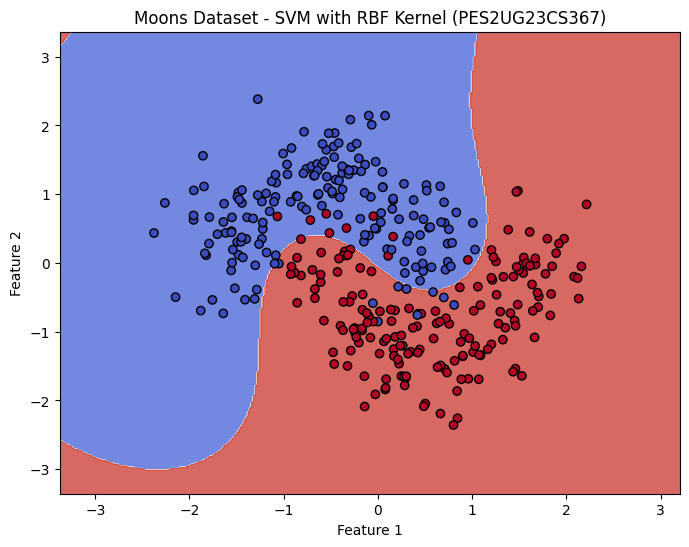

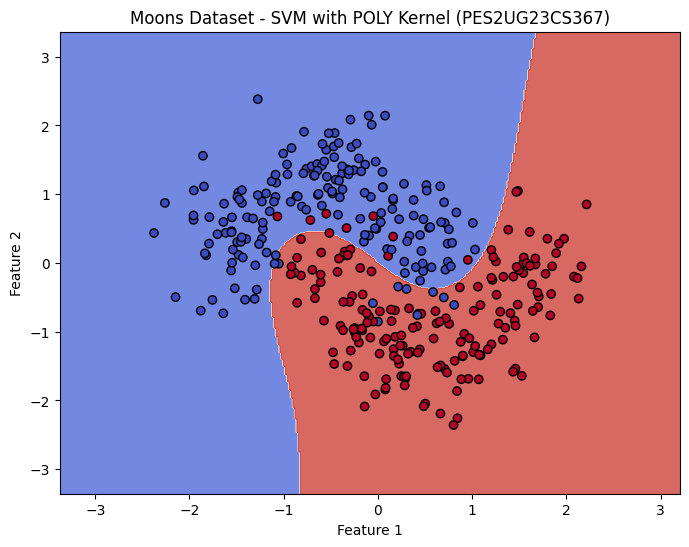

In [30]:
# Plot decision boundaries for each trained model
for kernel, model in models_moons.items():
    plot_decision_boundaries(X_train_m_s, y_train_m, model,
                             title=f'Moons Dataset - SVM with {kernel.upper()} Kernel ({SRN})')
